In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cases = pd.read_csv("~/desktop/cases.csv")

In [6]:
cases[:5]

,last_update,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
0,2020-05-30 17:32:48,Alabama,Autauga,"Autauga, Alabama, US",1001.0,32.539527,-86.644082,Medium metro,55200.0,214,387.68,4,7.25
1,2020-05-30 17:32:48,Alabama,Baldwin,"Baldwin, Alabama, US",1003.0,30.727750,-87.722071,Small metro,208107.0,283,135.99,9,4.32
2,2020-05-30 17:32:48,Alabama,Barbour,"Barbour, Alabama, US",1005.0,31.868263,-85.387129,Non-core,25782.0,148,574.04,1,3.88
3,2020-05-30 17:32:48,Alabama,Bibb,"Bibb, Alabama, US",1007.0,32.996421,-87.125115,Large fringe metro,22527.0,71,315.18,1,4.44
4,2020-05-30 17:32:48,Alabama,Blount,"Blount, Alabama, US",1009.0,33.982109,-86.567906,Large fringe metro,57645.0,60,104.09,1,1.73


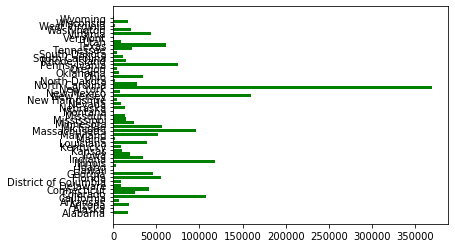

In [47]:
series1 = cases.groupby('state')['confirmed'].agg('sum')
s1 = series1.to_frame()
s1['state']=s1.index
plt.barh(s1.state,s1.confirmed,color='green')
plt.title=('Number of Confirmed Cases')
plt.show()

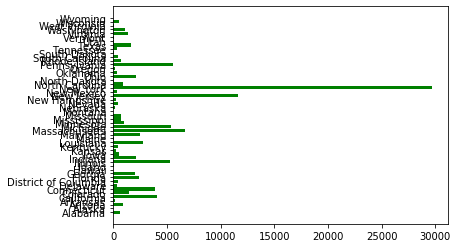

In [44]:
saeries2 = cases.groupby('state')['deaths'].agg('sum')
s2 = series2.to_frame()
s2['state']=s2.index
plt.barh(s2.state,s2.deaths,color='green')
plt.title=('Number of Death Cases')
plt.show()

In [51]:
pop = pd.read_csv("~/desktop/population.csv", encoding='latin-1')
pop[:5]

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,...,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,40,1,0,0,0,0,0,A,Alabama,Alabama,...,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,...,2699,2694,2643,2628,2608,2600,2584,2575,2571,2560
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,...,4500,4493,4471,4449,4420,4390,4356,4327,4308,4281
3,162,1,0,484,0,0,0,A,Addison town,Alabama,...,751,750,743,742,739,734,731,726,723,718
4,162,1,0,676,0,0,0,A,Akron town,Alabama,...,355,347,347,343,338,339,333,332,331,328


In [72]:
area = pd.read_csv("~/desktop/Total_area.csv")
area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
States        57 non-null object
Total area    57 non-null int64
Unnamed: 2    0 non-null float64
Unnamed: 3    0 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.9+ KB


In [70]:
data1 = pop.groupby('STNAME')['POPESTIMATE2019'].agg('sum')
data1 = data1.to_frame()
data1['States']=data1.index
data1[:5]

,POPESTIMATE2019,States
STNAME,,
Alabama,17708542,Alabama
Alaska,2687341,Alaska
Arizona,27627558,Arizona
Arkansas,11054564,Arkansas
California,151471659,California


In [94]:
df = pd.merge(area,data1,how='inner',on='States')
df['Pop_density']=df['POPESTIMATE2019']/df['Total area']
df.to_csv("popdensity.csv",index=False)

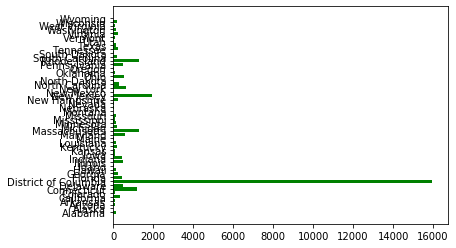

In [80]:
plt.barh(df.States,df.Pop_density,color='green')
plt.title=('States Population Density')
plt.show()

In [175]:
cases2 = pd.read_csv('~/desktop/cases2.csv')
cases2[:5]

,uid,location_type,fips_code,location_name,state,date,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000,new_cases_rolling_7_day_avg,new_deaths_rolling_7_day_avg
0,84001001,county,1001.0,Autauga,Alabama,01/22/2020,55200.0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,84001001,county,1001.0,Autauga,Alabama,01/23/2020,55200.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,84001001,county,1001.0,Autauga,Alabama,01/24/2020,55200.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,84001001,county,1001.0,Autauga,Alabama,01/25/2020,55200.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,84001001,county,1001.0,Autauga,Alabama,01/26/2020,55200.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [136]:
d1 = cases2[cases2.state=='New York']
d1 = d1.groupby('date')['cumulative_cases'].agg('sum')
d1 = d1.to_frame()
d1['Date']=d1.index
d1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 01/22/2020 to 05/29/2020
Data columns (total 2 columns):
cumulative_cases    129 non-null int64
Date                129 non-null object
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [176]:
d1[-5:]

,cumulative_cases,Date
date,,
05/25/2020,362764,2020-05-25
05/26/2020,363836,2020-05-26
05/27/2020,364965,2020-05-27
05/28/2020,366733,2020-05-28
05/29/2020,368284,2020-05-29


In [143]:
d1['Date'] = pd.to_datetime(d1['Date'],format='%m/%d/%Y')

In [158]:
d1_1 = d1.loc['01/22/2020':'04/17/2020']
d1_2 = d1.loc['04/18/2020':'05/29/2020']
d1_3 = d1.loc['03/22/2020':'04/18/2020']

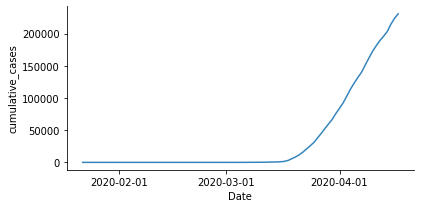

In [170]:
g1 = sns.FacetGrid(d1_1.sort_values(by = 'Date'),height=3, aspect = 2)
g1.map(plt.plot,'Date','cumulative_cases',alpha=0.9)
g1.set_xticklabels(step=2)

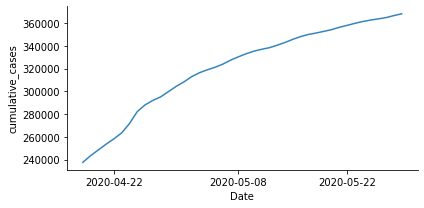

In [167]:
g2 = sns.FacetGrid(d1_2.sort_values(by = 'Date'),height=3, aspect = 2)
g2.map(plt.plot,'Date','cumulative_cases',alpha=0.9)
g2.set_xticklabels(step=2)

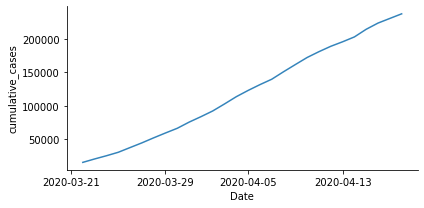

In [168]:
g3 = sns.FacetGrid(d1_3.sort_values(by = 'Date'),height=3, aspect = 2)
g3.map(plt.plot,'Date','cumulative_cases',alpha=0.9)
g3.set_xticklabels(step=2)

In [179]:
d2 = cases2[cases2.state=='California']
d2 = d2.groupby('date')['cumulative_cases'].agg('sum')
d2 = d2.to_frame()
d2['Date']=d2.index
d2['Date'] = pd.to_datetime(d2['Date'],format='%m/%d/%Y')

In [180]:
d2_1 = d2.loc['01/22/2020':'03/19/2020']
d2_2 = d2.loc['03/20/2020':'05/29/2020']

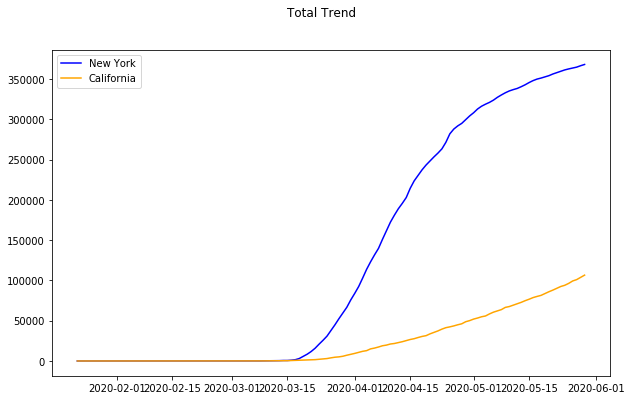

In [196]:
plt.figure(figsize=(10,6))
plt.plot(d1.Date, d1.cumulative_cases, color='blue', label='New York')
plt.plot(d2.Date, d2.cumulative_cases, color='orange', label='California')
plt.suptitle('Total Trend')
plt.legend()

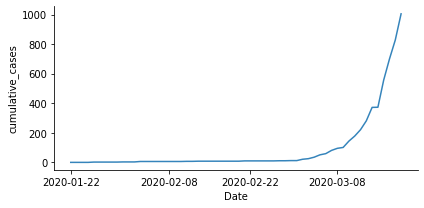

In [197]:
g2_1 = sns.FacetGrid(d2_1.sort_values(by = 'Date'),height=3, aspect = 2)
g2_1.map(plt.plot,'Date','cumulative_cases',alpha=0.9)
g2_1.set_xticklabels(step=2)

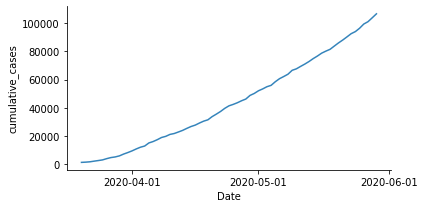

In [198]:
g2_2 = sns.FacetGrid(d2_2.sort_values(by = 'Date'),height=3, aspect = 2)
g2_2.map(plt.plot,'Date','cumulative_cases',alpha=0.9)
g2_2.set_xticklabels(step=2)